# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [ ]:
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = pd.read_csv('passengers.csv')

In [4]:
ts.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [5]:
ts.Month = pd.to_datetime(ts.Month)

In [7]:
ts.set_index('Month', inplace=True)

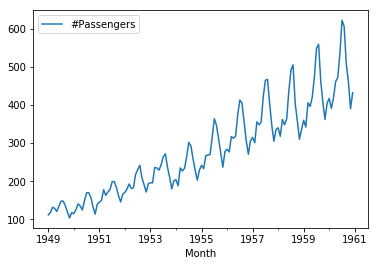

In [10]:
ts.plot();

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [20]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts):
    rollmean = ts.rolling(window=8).mean()
    rollstd = ts.rolling(window=8).std()
    
    plt.figure(figsize=(10,6))
    plt.plot(ts, label='Data')
    plt.plot(rollmean, label='Rolling mean')
    plt.plot(rollstd, label='Rolling standard deviation')
    plt.title('Rolling mean and standard deviation')
    plt.legend()
    plt.show()
    
    dftest = adfuller(ts['#Passengers']) # Ideally the column name would also need to be used as a function parameter
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Use your newly created function on the airpassenger data set.

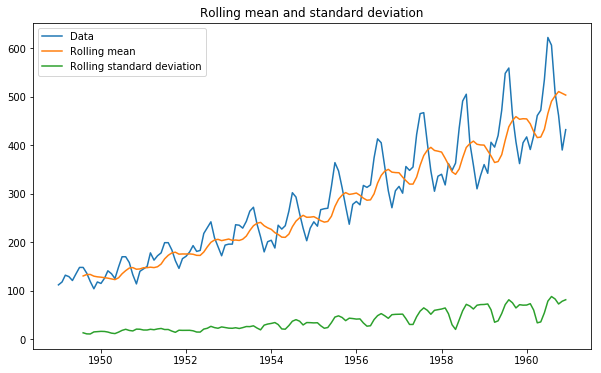

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
# Code here
stationarity_check(ts)

## Perform a log() and sqrt() transform

In [24]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)

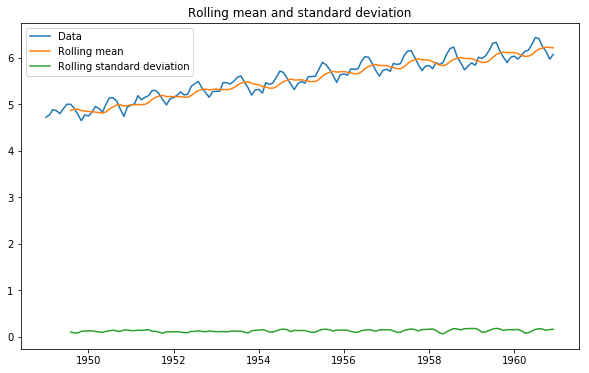

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
stationarity_check(ts_log)

In [30]:
# Sqrt transform timeseries and compare with original to check the effect
ts_sqrt = np.sqrt(ts)

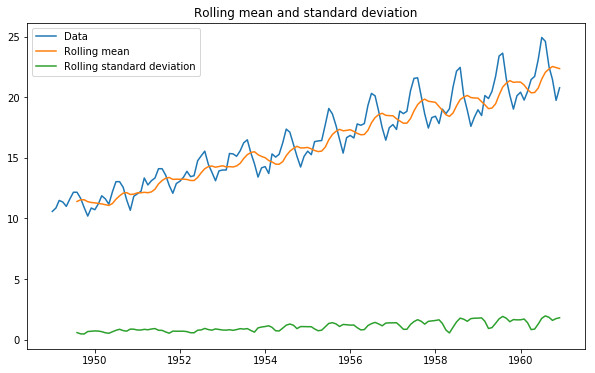

Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [31]:
stationarity_check(ts_sqrt)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [33]:
# your code here
rolmean = ts_log.rolling(window = 7).mean()

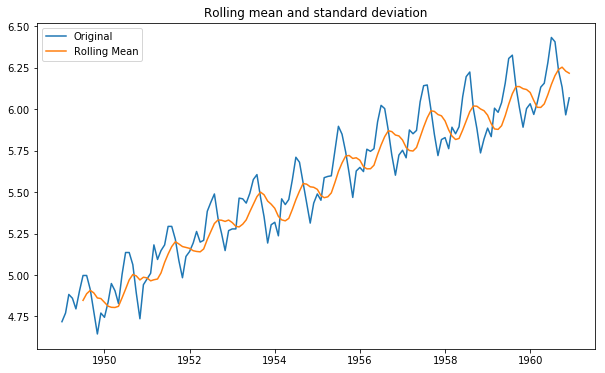

In [42]:
plt.figure(figsize=(10,6))
plt.plot(ts_log, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.legend()
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [49]:
# Subtract the moving average from the original data and check head for Nans
ts_minus_rolmean = ts_log - rolmean
ts_minus_rolmean.isna().sum()

#Passengers    6
dtype: int64

In [50]:
# Drop the NaN values from timeseries calculated above
ts_minus_rolmean.dropna(inplace=True)

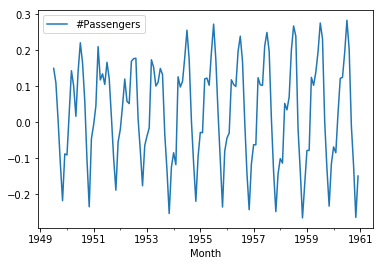

In [51]:
# Plot the result
ts_minus_rolmean.plot();

Finally, use your function `check_stationarity` to see if this series is considered stationary!

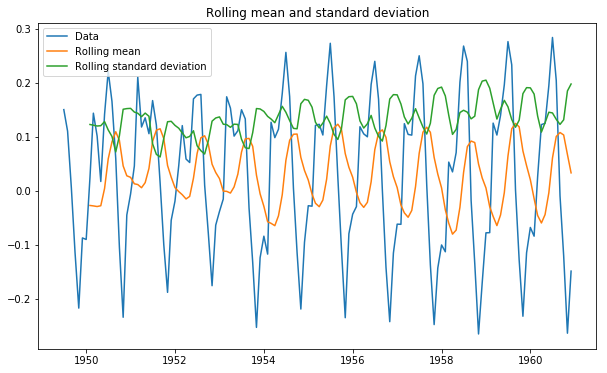

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [52]:
# Your code here
stationarity_check(ts_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


The time series is still not stationary as p > 0.05.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighted* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

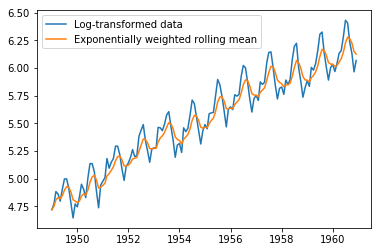

In [55]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = ts_log.ewm(halflife = 2).mean()
# Plot the original data with exp weighted average
plt.plot(ts_log, label = 'Log-transformed data')
plt.plot(exp_rolmean, label = 'Exponentially weighted rolling mean')
plt.legend();

In [56]:
# Subtract the moving average from the original data and plot
ts_minus_exp_rolmean = ts_log - exp_rolmean
ts_minus_exp_rolmean.isna().sum()

#Passengers    0
dtype: int64

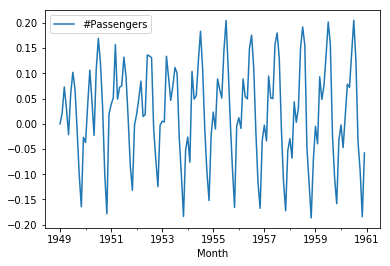

In [57]:
ts_minus_exp_rolmean.plot()

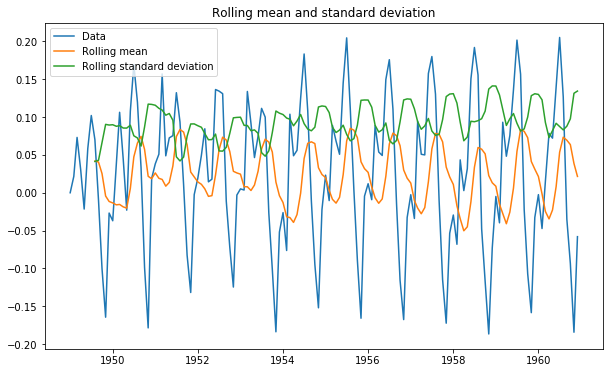

Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [58]:
# do a stationarity check
stationarity_check(ts_minus_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


Subtracting the exponentially weighted rolling average from the log-transformed data results in a stationary time series, although there is still strong seasonality.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right number for `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [63]:
# difference your data and look at the head
data_diff = ts_minus_exp_rolmean.diff(periods=12)
data_diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


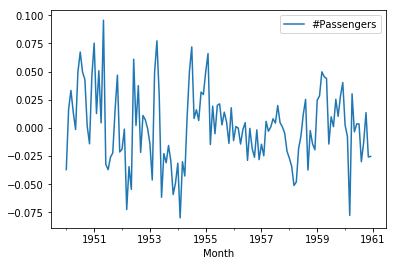

In [65]:
# plot your differenced time series
data_diff.plot();

In [66]:
# drop nas
data_diff.dropna(inplace=True)

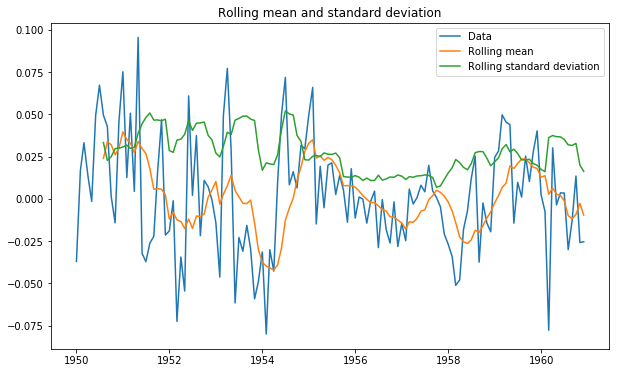

Test Statistic                  -4.158133
p-value                          0.000775
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [68]:
# perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

The data is stationary and seasonal trends have been removed. We can now see actual trends, e.g. the increase from 1954 to 1955 and then decrease down to 1958.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.